# Test a Perceptual Phenomenon
#### Question 1:
The independent variable in the stroop test is the condition of the text. It is either congruent, with the text color matching the text, or incoungruent, where the color and text do not match. The dependent variable is the time it takes for the participants to name the colors.

#### Question 2:
The alternative hypothesis for this test is that the mean time for the population to name colors will be different between congruent ($\mu_c $) and incongruent ($\mu_i $) conditions.
$$ h_1:\mu_c \neq \mu_i $$
The null hypothesis is that there will be no difference between the means.
$$ h_0:\mu_c = \mu_i $$
A Dependent T-Test should be used to determine if there is a significant difference between the means of the samples. The T-test was chosen over the Z-test because the standard deviation ($\sigma$) of the population is unknown. The T-Test is also well suited to sample sizes of less than 30, as is this case. The Dependent version of the T-test was chosen because it is used to compare the means between related groups. This is appropriate because the experiment uses a within-groups testing method in which the participants are tested under both conditions.

#### Question 3: Statistical tests

In [22]:
# Import pandas for working with data
import pandas as pd
# Import scipy for statistical tests
import scipy

# Import pyplot for labelling and working with visualizations
import matplotlib.pyplot as plt
# Seaborn expands on matplots capabilities for statistical plotting
import seaborn as sns

# Set plotting to display within the notebook
%matplotlib inline

In [2]:
# Use pandas to read the data CSV into a dataframe.
time_df = pd.read_csv('stroopdata.csv')

The first step was to explore the data. The `head()` function prints the first few rows of data, just ot verify that it has been read properly and that the columns have meaningful names.

In [12]:
time_df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


The Panda's `describe()` method provides a convenient way to quickly view statistics of the data.

In [4]:
time_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


From the results we can see that the data contains 24 records, with equal numbers of obvervations for both the  **Congruent** and **Incongruent** conditions. The sample means and standard devations have been returned. Also returned are minimum, maximum and quartile values. There

#### Question 4: Visualizations
The `distplot()` function from Seaborn can be used to plot the distribution of the samples.

Text(0.5,0,u'Time')

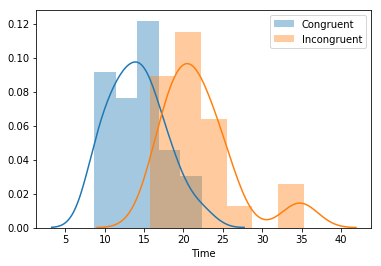

In [72]:
sns.distplot(time_df.Congruent)
sns.distplot(time_df.Incongruent)

plt.legend(['Congruent', 'Incongruent'])
plt.xlabel('Time')

These distributions appear to have a strong positive skew. There also appear to be outliers in the **Incongruent** times. PROPHET StatGuide recommends a box plot as a way to identify possible outliers. The boxplot below confirms that there are two likely outliers.

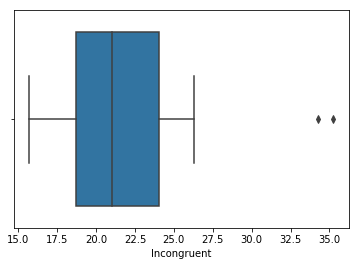

In [89]:
#use Seaborn to print a boxplot
sns.boxplot(time_df.Incongruent)

According to PROPHET StatGuide, these conditions can cause the null hypothesis to be incorrectly rejected. Their recommendation is to transform the data to resolve both of these issues, which I did using a log function.

In [55]:
# Apply the numpy log function to create a dataframe of log times.
log_time = time_df.apply(np.log)

(0, 2.5)

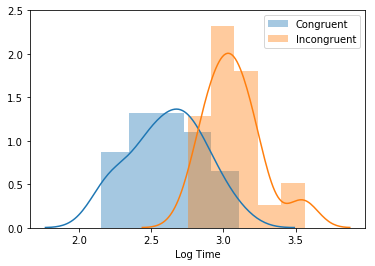

In [83]:
import numpy as np
sns.distplot(log_time.Congruent)
sns.distplot(log_time.Incongruent)

plt.legend(['Congruent', 'Incongruent'])
plt.xlabel('Log Time')
plt.ylim(0,2.5)

While the **Incongruent** data still appears slightly skewed, the effect is greatly reduced.

#### Question 5: Dependent T-Test
The Scipy Stats module was used to perform the actual t-test.

In [87]:
# ttest_rel() returns the t-statistic and p-value for two related samples
t, p = scipy.stats.ttest_rel(log_time.Congruent, log_time.Incongruent)
print('T-statistic: {0}'.format(t))
print('P-value {0}'.format(p))

T-statistic: -8.90949854348
Pvalue 6.44376790156e-09


The P-value is less than .0001, allowing us to reject the null hypothesis that the means are equal. This suggests that there is a significant difference between participants' abilities to name colors between the **Congruent** and **Incongruent** conditions, with the mean time being 7.965 seconds slower for the **Incongruent** condition.

#### References
PROPHET StatGuide: Do your data violate paired t test assumptions? . (1997, March 18). Retrieved January 2, 2018, from http://www.basic.northwestern.edu/statguidefiles/ttest_paired_ass_viol.html 